In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import GPy
import numpy as np
np.random.seed(101)

In [2]:
N = 50
noise_var = 0.05

X = np.linspace(0,10,50)[:,None]
k = GPy.kern.RBF(1)
y = np.random.multivariate_normal(np.zeros(N),k.K(X)+np.eye(N)*np.sqrt(noise_var)).reshape(-1,1)



Name : GP regression
Objective : 50.08607234670178
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |    1.658248604040738  |      +ve      |        
  rbf.lengthscale          |   1.1121538306345262  |      +ve      |        
  Gaussian_noise.variance  |  0.23613423695169422  |      +ve      |        


 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


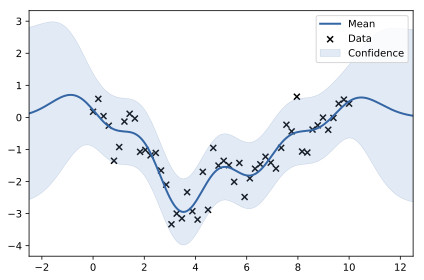

In [4]:
m_full = GPy.models.GPRegression(X,y)
m_full.optimize('bfgs')
m_full.plot()
print(m_full)



Name : sparse_gp
Objective : 260.8098280164652
Number of Parameters : 9
Number of Optimization Parameters : 9
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (6, 1)  |               |        
  rbf.variance             |     1.0  |      +ve      |        
  rbf.lengthscale          |     1.0  |      +ve      |        
  Gaussian_noise.variance  |    0.05  |      +ve      |        


 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


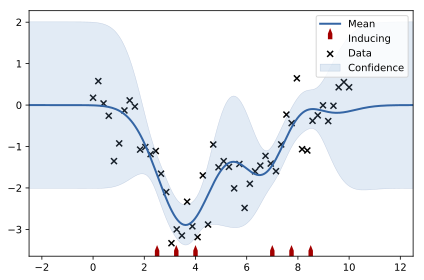

In [6]:
Z = np.hstack((np.linspace(2.5,4.,3),np.linspace(7,8.5,3)))[:,None]
m = GPy.models.SparseGPRegression(X,y,Z=Z)
m.likelihood.variance = noise_var
m.plot()
print(m)



Name : sparse_gp
Objective : 53.9735537076852
Number of Parameters : 9
Number of Optimization Parameters : 3
Updates : True
Parameters:
  sparse_gp.               |                value  |  constraints  |  priors
  inducing_inputs          |               (6, 1)  |     fixed     |        
  rbf.variance             |   1.7390511801288366  |      +ve      |        
  rbf.lengthscale          |   3.0231265097137254  |      +ve      |        
  Gaussian_noise.variance  |  0.37299000991464976  |      +ve      |        


 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


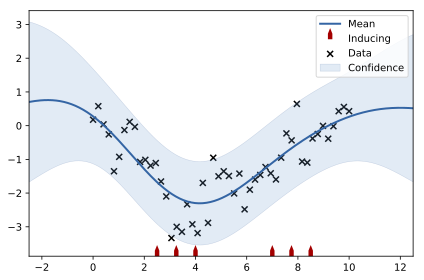

In [7]:
m.inducing_inputs.fix()
m.optimize('bfgs')
m.plot()
print(m)

{'inducing': <matplotlib.collections.PathCollection at 0x1a1cbf0b70>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x1a1cbf04e0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a1cbf0630>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x10c7c1c50>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


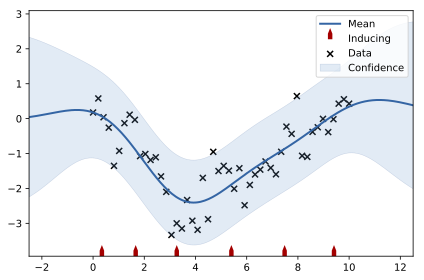

In [8]:
m.randomize()
m.Z.unconstrain()
m.optimize('bfgs')
m.plot()

[[-50.0984472]] -50.08607234670178


 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


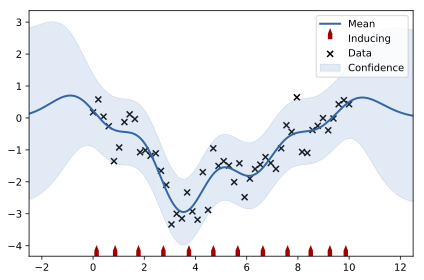

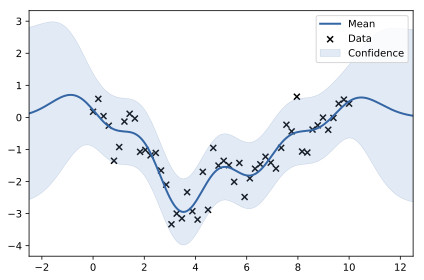

In [10]:
Z = np.random.rand(12,1)*12
m = GPy.models.SparseGPRegression(X,y,Z=Z)

m.optimize('bfgs')
m.plot()
m_full.plot()
print(m.log_likelihood(), m_full.log_likelihood())